# STATISTICAL ANALYSIS ON STOCK DATA

In [2]:
#Kaggle:-https://www.kaggle.com/jatta3399
#Linkedin:https://www.linkedin.com/in/mseeeeeeeeee/
#Github:https://github.com/manjotsingh99

In [1]:
import pandas as pd

Uncomment the lines if nsepy is working as i was facing issues with the colab and nsepy so first i converted the files into csv from the local jupyter and loaded it from local file source.

In [2]:
# !pip install nsepy
from nsepy import get_history
from datetime import date

In [3]:
jio_df=get_history(symbol="RELIANCE",start=date(2015,1,1),end=date(2016,12,31))
airtel_df=get_history(symbol="BHARTIARTL",start=date(2015,1,1),end=date(2016,12,31))
nifty_df=get_history(symbol="NIFTY 500",start=date(2015,1,1),end=date(2016,12,31),index=True)

In [6]:
jio_df=pd.read_csv("/content/jio_df.csv")
airtel_df=pd.read_csv("/content/airtel_df.csv")
nifty_df=pd.read_csv("/content/nifty_df.csv")

FileNotFoundError: [Errno 2] File /content/jio_df.csv does not exist: '/content/jio_df.csv'

In [5]:
jio_df=jio_df.reset_index()

In [6]:
airtel_df=airtel_df.reset_index()

In [7]:
airtel_df.shape

(495, 15)

In [8]:
jio_df.shape

(495, 15)

In [9]:
nifty_df.shape

(495, 6)

In [10]:
airtel_df["Date"]=pd.to_datetime(airtel_df["Date"])

In [11]:
airtel_df['Week'] = airtel_df.Date.dt.weekofyear

In [12]:
jio_df["Date"]=pd.to_datetime(jio_df["Date"])
jio_df['Week'] = jio_df.Date.dt.weekofyear

In [13]:
nifty_df=nifty_df.reset_index()

In [14]:
nifty_df["Date"]=pd.to_datetime(nifty_df["Date"])
nifty_df['Week'] = nifty_df.Date.dt.weekofyear

In [15]:
airtel_df.index=airtel_df["Date"]
nifty_df.index=nifty_df["Date"]
jio_df.index=jio_df["Date"]

**Part** **1**
# STATISTICAL ANALYSIS

Create 4,16,....,52 week moving average (closing price) for each stock and index. This should happen through a function.

In [16]:
def func(data):
    MOVINGAVG=pd.DataFrame()
    MOVINGAVG["close"]=data["Close"].resample('W').mean()
    avg=MOVINGAVG["close"]
    a=avg.to_list()
    x=int(input("Moving Avg of how many weeks: "))
    b=[]
    c=[]
    for i in range(len(a)):
            if i==x-1:
                z=0
                b=a[z:x]
                e=sum(b)/x
                c.append(e)
                z=z+1
            elif i>=x:
                b=a[z:i+1]
                e=sum(b)/x
                c.append(e)
                z=z+1
            else:
                e="NaN"
                c.append(e)
    
    return c

In [17]:
#####LOGIC BEHIND THE CODE######
# # i=0
# a1=a[0:4]
# a[3]=sum(a1)/4
# print(a[3])
# # i=1
# print(a[1:5])
# #i=2
# print(a[2:6])

In [18]:
#Enter the stock market data you need to calculate
func(nifty_df)
#Then choose any no. of weeks you need!!!!

Moving Avg of how many weeks: 4


['NaN',
 'NaN',
 'NaN',
 6879.803749999999,
 6979.144375000001,
 7070.521875,
 7115.3168749999995,
 7145.579374999999,
 7129.903333333334,
 7180.415208333334,
 7207.607708333333,
 7178.870208333334,
 7121.019375,
 7044.939166666667,
 7055.064166666667,
 7079.539166666667,
 7074.804166666667,
 7014.731250000001,
 6906.418750000001,
 6803.8237500000005,
 6809.58375,
 6844.6875,
 6849.049999999999,
 6806.487499999999,
 6745.1,
 6745.195,
 6786.942499999999,
 6877.1275000000005,
 6974.4725,
 7027.282499999999,
 7041.7925,
 7089.409999999999,
 7086.755,
 7073.5725,
 6970.4625,
 6811.01,
 6657.737499999999,
 6538.19875,
 6535.7300000000005,
 6551.8875,
 6641.7875,
 6700.42125,
 6782.9275,
 6840.1975,
 6814.312500000001,
 6752.8724999999995,
 6668.897499999999,
 6622.827499999999,
 6612.015,
 6590.2675,
 6582.135,
 6580.6975,
 6592.547500000001,
 6611.977499999999,
 6573.302500000001,
 6454.9075,
 6341.81125,
 6261.866249999999,
 6169.37125,
 6119.80375,
 6028.62,
 5990.0275,
 6050.589375,
 6

# But we can use the alternative to the above code which is using rolling function and then we will visualize the data too.

In [21]:
def func(data):
    avge=pd.DataFrame()
    x=int(input("Moving Avg of how many weeks: "))
    avge["close"]=data["Close"].resample("W").mean()
    movavg=avge["close"].rolling(x).mean()
    avge["week data"]=movavg
    avge.plot(title="Moving Avg for {} week".format(x))

Moving Avg of how many weeks: 52


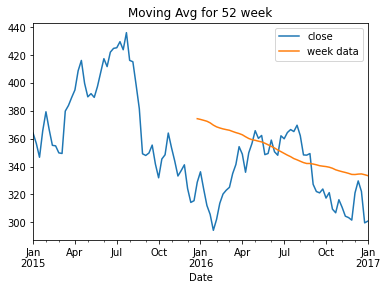

In [22]:
func(airtel_df)

Moving Avg of how many weeks: 4


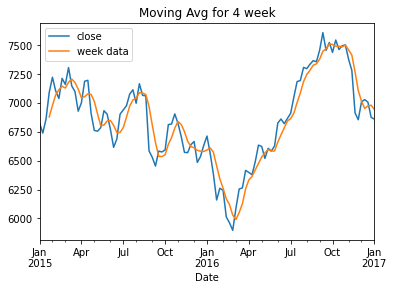

In [23]:
func(nifty_df)

Moving Avg of how many weeks: 16


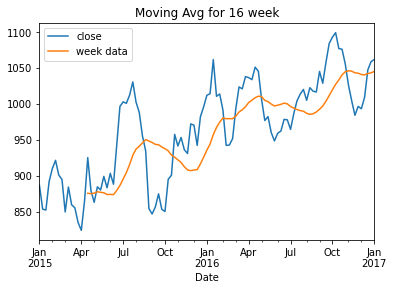

In [24]:
func(jio_df)

# Create rolling window of size 10 on each stock/index. Handle unequal time series due to stock market holidays. You should look to increase your rolling window size to 50 and see how the data looks like.

In [25]:
#Handling missing data and forward fillinf them#######
airtel_df=airtel_df.asfreq("D",method="ffill")
nifty_df=nifty_df.asfreq("D",method="ffill")
jio_df=jio_df.asfreq("D",method="ffill")

In [26]:
def func1(data):
    avge=pd.DataFrame()
    x=int(input("Moving Avg of how many days: "))
    avge["close"]=data["Close"]
    movavg=avge["close"].rolling(x).mean()
    avge["New rolling data"]=movavg
    avge.plot(title="Moving Avg for {} week".format(x))

Moving Avg of how many days: 10


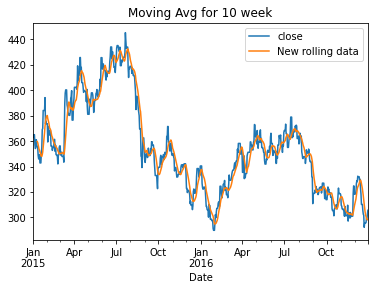

In [27]:
func1(airtel_df)
#for 10 days enter 10

Moving Avg of how many days: 75


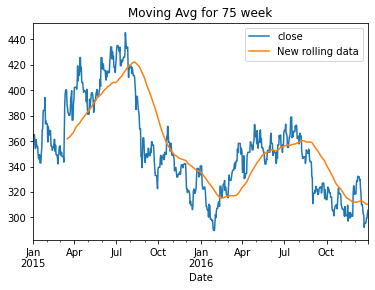

In [28]:
func1(airtel_df)
#for 75 days enter 75

# Volume shocks : make a 0/1 dummy-coded boolean time series for shock, based on whether volume traded is 10% higher/lower than previous day. ( 0/1 dummy-coding is for direction of shock)

In [29]:
def func2(data):
    
    pp=data.Volume
    a=pp.to_list()
    b=[]
    for i in range(len(a)):
        if a[i]==a[i-1]:
            c=0
            b.append(c)
        else:
            c=int((abs(a[i]-a[i-1])/a[i-1]*100) > 10)
            b.append(c)
    data["VolumeShock"]=b
###1->>>Higher
###0->>>Lower

In [30]:
func2(airtel_df)

In [31]:
func2(nifty_df)

In [32]:
func2(jio_df)

In [33]:
nifty_df.head(5)

Date     Open     High      Low    Close     Volume  \
Date                                                                   
2015-01-01 2015-01-01  6767.60  6794.25  6755.00  6786.10  440905954   
2015-01-02 2015-01-02  6792.40  6883.05  6792.40  6866.45  617743719   
2015-01-03 2015-01-02  6792.40  6883.05  6792.40  6866.45  617743719   
2015-01-04 2015-01-02  6792.40  6883.05  6792.40  6866.45  617743719   
2015-01-05 2015-01-05  6877.35  6913.25  6848.25  6857.45  614330577   

                Turnover  Week  VolumeShock  
Date                                         
2015-01-01  7.133120e+10     1            1  
2015-01-02  1.216331e+11     1            1  
2015-01-03  1.216331e+11     1            0  
2015-01-04  1.216331e+11     1            0  
2015-01-05  1.231650e+11     2            0

In [34]:
###now we have to create a dummy series for the direction of shock###
def func3(data):
    
    pp=data.Volume
    a=pp.to_list()
    b=[]
    for i in range(len(a)):
        if a[i]==a[i-1]:
            c="NaN"
            b.append(c)
        else:
            if (a[i] - a[i-1]) < 0:
                c=0
                b.append(c)
            else:
                c=1
                b.append(c)
    data["VolumeShockDirection"]=b

In [35]:
func3(airtel_df)

In [36]:
func3(nifty_df)

In [37]:
func3(jio_df)

In [38]:
airtel_df.head(5)

Date      Symbol Series  Prev Close    Open    High     Low  \
Date                                                                           
2015-01-01 2015-01-01  BHARTIARTL     EQ      352.70  354.40  364.90  351.65   
2015-01-02 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-03 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-04 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-05 2015-01-05  BHARTIARTL     EQ      365.05  366.25  366.25  355.60   

              Last   Close    VWAP   Volume      Turnover  Trades  \
Date                                                                
2015-01-01  363.00  362.90  358.90  2217263  7.957697e+13   25445   
2015-01-02  365.15  365.05  364.73  2519814  9.190425e+13   46461   
2015-01-03  365.15  365.05  364.73  2519814  9.190425e+13   46461   
2015-01-04  365.15  365.05  364.73  2519814  9.190425e+13   46461   
2015-01-05  357.20  356.95  359.31  1446759  5.198369e+13   27848   

            Deliverable Volume  %Deliverble  Week  VolumeShock  \
Date                                                             
2015-01-01             1042436       0.4701     1            1   
2015-01-02             1493017       0.5925     1            1   
2015-01-03             1493017       0.5925     1            0   
2015-01-04             1493017       0.5925     1            0   
2015-01-05              688766       0.4761     2            1   

           VolumeShockDirection  
Date                             
2015-01-01                    1  
2015-01-02                    1  
2015-01-03                  NaN  
2015-01-04                  NaN  
2015-01-05                    0

# Price shocks : make a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 2%. ( 0/1 dummy-coding is for direction of shock)

# 3.3 Pricing black swan : make a 0/1 dummy-coded boolean time series for shock, based on whether closing price at T vs T+1 has a difference > 5%. ( 0/1 dummy-coding is for direction of shock)

In [39]:
def func4(data):
    
    data["nextdayprice"] = data.Close.shift(1)
    data["price_shock"] = (abs((data["nextdayprice"] - data["Close"])/data["Close"]*100)  > 2).astype(int)
    data["pricing_black_swan"] = (abs((data["nextdayprice"] - data["Close"])/data["Close"]*100)  > 5).astype(int)

In [40]:
func4(airtel_df)
func4(nifty_df)
func4(jio_df)

In [41]:
airtel_df.head(5)

Date      Symbol Series  Prev Close    Open    High     Low  \
Date                                                                           
2015-01-01 2015-01-01  BHARTIARTL     EQ      352.70  354.40  364.90  351.65   
2015-01-02 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-03 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-04 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-05 2015-01-05  BHARTIARTL     EQ      365.05  366.25  366.25  355.60   

              Last   Close    VWAP  ...      Turnover  Trades  \
Date                                ...                         
2015-01-01  363.00  362.90  358.90  ...  7.957697e+13   25445   
2015-01-02  365.15  365.05  364.73  ...  9.190425e+13   46461   
2015-01-03  365.15  365.05  364.73  ...  9.190425e+13   46461   
2015-01-04  365.15  365.05  364.73  ...  9.190425e+13   46461   
2015-01-05  357.20  356.95  359.31  ...  5.198369e+13   27848   

            Deliverable Volume  %Deliverble  Week  VolumeShock  \
Date                                                             
2015-01-01             1042436       0.4701     1            1   
2015-01-02             1493017       0.5925     1            1   
2015-01-03             1493017       0.5925     1            0   
2015-01-04             1493017       0.5925     1            0   
2015-01-05              688766       0.4761     2            1   

            VolumeShockDirection nextdayprice  price_shock  pricing_black_swan  
Date                                                                            
2015-01-01                     1          NaN            0                   0  
2015-01-02                     1       362.90            0                   0  
2015-01-03                   NaN       365.05            0                   0  
2015-01-04                   NaN       365.05            0                   0  
2015-01-05                     0       365.05            1                   0  

[5 rows x 21 columns]

In [42]:
def func5(data):
    
    if data["price_shock"] == 0:
        pass
    else:
        if (data["nextdayprice"] - data["Close"]) < 0:
            return 0
        else:
            return 1
def func6(data):
    data['priceShockDir'] = 'Nan'
    data['priceShockDir'] = data.apply(func5, axis=1)

In [43]:
func6(airtel_df)
func6(nifty_df)
func6(jio_df)

In [44]:
airtel_df.head(5)

Date      Symbol Series  Prev Close    Open    High     Low  \
Date                                                                           
2015-01-01 2015-01-01  BHARTIARTL     EQ      352.70  354.40  364.90  351.65   
2015-01-02 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-03 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-04 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-05 2015-01-05  BHARTIARTL     EQ      365.05  366.25  366.25  355.60   

              Last   Close    VWAP  ...  Trades  Deliverable Volume  \
Date                                ...                               
2015-01-01  363.00  362.90  358.90  ...   25445             1042436   
2015-01-02  365.15  365.05  364.73  ...   46461             1493017   
2015-01-03  365.15  365.05  364.73  ...   46461             1493017   
2015-01-04  365.15  365.05  364.73  ...   46461             1493017   
2015-01-05  357.20  356.95  359.31  ...   27848              688766   

            %Deliverble  Week  VolumeShock  VolumeShockDirection  \
Date                                                               
2015-01-01       0.4701     1            1                     1   
2015-01-02       0.5925     1            1                     1   
2015-01-03       0.5925     1            0                   NaN   
2015-01-04       0.5925     1            0                   NaN   
2015-01-05       0.4761     2            1                     0   

            nextdayprice price_shock  pricing_black_swan  priceShockDir  
Date                                                                     
2015-01-01           NaN           0                   0            NaN  
2015-01-02        362.90           0                   0            NaN  
2015-01-03        365.05           0                   0            NaN  
2015-01-04        365.05           0                   0            NaN  
2015-01-05        365.05           1                   0            1.0  

[5 rows x 22 columns]

In [45]:
def func7(data):
    
    if data["pricing_black_swan"] == 0:
        pass
    else:
        if (data["nextdayprice"] - data["Close"]) < 0:
            return 0
        else:
            return 1
def func8(data):
    data['priceShockblackDir'] = 'Nan'
    data['priceShockblackDir'] = data.apply(func7, axis=1)

In [46]:
func8(airtel_df)
func8(nifty_df)
func8(jio_df)

In [47]:
airtel_df.head(5)

Date      Symbol Series  Prev Close    Open    High     Low  \
Date                                                                           
2015-01-01 2015-01-01  BHARTIARTL     EQ      352.70  354.40  364.90  351.65   
2015-01-02 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-03 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-04 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-05 2015-01-05  BHARTIARTL     EQ      365.05  366.25  366.25  355.60   

              Last   Close    VWAP  ...  Deliverable Volume  %Deliverble  \
Date                                ...                                    
2015-01-01  363.00  362.90  358.90  ...             1042436       0.4701   
2015-01-02  365.15  365.05  364.73  ...             1493017       0.5925   
2015-01-03  365.15  365.05  364.73  ...             1493017       0.5925   
2015-01-04  365.15  365.05  364.73  ...             1493017       0.5925   
2015-01-05  357.20  356.95  359.31  ...              688766       0.4761   

            Week  VolumeShock  VolumeShockDirection  nextdayprice  \
Date                                                                
2015-01-01     1            1                     1           NaN   
2015-01-02     1            1                     1        362.90   
2015-01-03     1            0                   NaN        365.05   
2015-01-04     1            0                   NaN        365.05   
2015-01-05     2            1                     0        365.05   

            price_shock pricing_black_swan  priceShockDir  priceShockblackDir  
Date                                                                           
2015-01-01            0                  0            NaN                 NaN  
2015-01-02            0                  0            NaN                 NaN  
2015-01-03            0                  0            NaN                 NaN  
2015-01-04            0                  0            NaN                 NaN  
2015-01-05            1                  0            1.0                 NaN  

[5 rows x 23 columns]

# 3.4 Pricing shock without volume shock : create a new time series based on points 3.1 & 3.2

In [49]:
def func9(data):
    
    data["not_vol_shock"]  = (~(data["VolumeShock"].astype(bool))).astype(int)
    data["price_shock_w0_vol_shock"] = data["not_vol_shock"] & data["price_shock"]

In [50]:
func9(airtel_df)
func9(nifty_df)
func9(jio_df)

In [51]:
airtel_df.head()

Date      Symbol Series  Prev Close    Open    High     Low  \
Date                                                                           
2015-01-01 2015-01-01  BHARTIARTL     EQ      352.70  354.40  364.90  351.65   
2015-01-02 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-03 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-04 2015-01-02  BHARTIARTL     EQ      362.90  363.80  367.00  362.00   
2015-01-05 2015-01-05  BHARTIARTL     EQ      365.05  366.25  366.25  355.60   

              Last   Close    VWAP  ...  Week  VolumeShock  \
Date                                ...                      
2015-01-01  363.00  362.90  358.90  ...     1            1   
2015-01-02  365.15  365.05  364.73  ...     1            1   
2015-01-03  365.15  365.05  364.73  ...     1            0   
2015-01-04  365.15  365.05  364.73  ...     1            0   
2015-01-05  357.20  356.95  359.31  ...     2            1   

            VolumeShockDirection  nextdayprice  price_shock  \
Date                                                          
2015-01-01                     1           NaN            0   
2015-01-02                     1        362.90            0   
2015-01-03                   NaN        365.05            0   
2015-01-04                   NaN        365.05            0   
2015-01-05                     0        365.05            1   

            pricing_black_swan  priceShockDir priceShockblackDir  \
Date                                                               
2015-01-01                   0            NaN                NaN   
2015-01-02                   0            NaN                NaN   
2015-01-03                   0            NaN                NaN   
2015-01-04                   0            NaN                NaN   
2015-01-05                   0            1.0                NaN   

            not_vol_shock  price_shock_w0_vol_shock  
Date                                                 
2015-01-01              0                         0  
2015-01-02              0                         0  
2015-01-03              1                         0  
2015-01-04              1                         0  
2015-01-05              0                         0  

[5 rows x 25 columns]

In [52]:
def func10(data):
    
    data['Volume']=data['Volume'].pct_change()*100
    data["price_shock_w0_vol_shock"]=data.Close*data["price_shock_w0_vol_shock"]

In [53]:
func10(airtel_df)
func10(nifty_df)
func10(jio_df)

# Part2


# DATA VISUALIZATION

In [57]:
import altair as alt

# Color timeseries between two volume shocks in a different color (Red)

In [58]:
def func(data):

  base = alt.Chart(data,title="timeseries between two volume shocks in a different color").properties(width=600,height=300).mark_circle(
      interpolate='step-after',color='blue').encode(
          alt.X("Date"),alt.Y('Close',title=""),alt.Color(
              "VolumeShock",scale=alt.Scale(
              domain=[0, 1],
              range=['blue', 'red'])))
  return base

In [59]:
func(airtel_df)

alt.Chart(...)

In [60]:
func(nifty_df)

alt.Chart(...)

In [61]:
func(jio_df)

alt.Chart(...)

Color timeseries in simple blue color.

In [62]:
def func1(data):

  base = alt.Chart(data,title="TimeSeries").properties(width=600,height=300).mark_line(
      interpolate='step-after',color='blue').encode(
          alt.X("Date"),alt.Y('Close',title=""))
  return base

In [63]:
func1(airtel_df)

alt.Chart(...)

In [64]:
func1(nifty_df)

alt.Chart(...)

In [65]:
func1(jio_df)

alt.Chart(...)

# Mark closing Pricing shock without volume shock to identify volumeless price movement.

In [66]:
def func2(data):  

  base = alt.Chart(data,title="closing Pricing shock without volume shock to identify volumeless price movement").properties(
      width=600,height=300).mark_circle(
      interpolate='step-after',color='orange').encode(
          x="Date",y="price_shock_w0_vol_shock")
  return base    

In [67]:
func2(airtel_df)

alt.Chart(...)

In [68]:
func2(jio_df)

alt.Chart(...)

In [69]:
func2(nifty_df)

alt.Chart(...)

# Make sure you set gradient color in blue spectrum based on difference of 52 week moving average.

In [70]:
avg=pd.DataFrame()
avg["close"]=airtel_df["Close"].resample("W").mean()
movavg=avg["close"].rolling(52).mean()
airtel_df["52 week moving avg"]=movavg
airtel_df['52 week moving avg']=airtel_df['52 week moving avg'].fillna(0)
airtel_df['52 week moving avg']=airtel_df['52 week moving avg'].diff().round(2).fillna(0)

In [71]:
alt.Chart(airtel_df).mark_circle(
    line={'color':'blue'},
    color=alt.Gradient(
        gradient='radial',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='blue', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    alt.X('Date:T'),
    alt.Y('52 week moving avg'),
    alt.Color("52 week moving avg")
)

alt.Chart(...)

In [72]:
avg=pd.DataFrame()
avg["close"]=jio_df["Close"].resample("W").mean()
movavg=avg["close"].rolling(52).mean()
jio_df["52 week moving avg"]=movavg
jio_df['52 week moving avg']=jio_df['52 week moving avg'].fillna(0)
jio_df['52 week moving avg']=jio_df['52 week moving avg'].diff().round(2).fillna(0)

In [73]:
alt.Chart(jio_df).mark_circle(
    line={'color':'blue'},
    color=alt.Gradient(
        gradient='radial',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='blue', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    alt.X('Date:T'),
    alt.Y('52 week moving avg'),
    alt.Color("52 week moving avg")
)

alt.Chart(...)

In [74]:
avg=pd.DataFrame()
avg["close"]=nifty_df["Close"].resample("W").mean()
movavg=avg["close"].rolling(52).mean()
nifty_df["52 week moving avg"]=movavg
nifty_df['52 week moving avg']=nifty_df['52 week moving avg'].fillna(0)
nifty_df['52 week moving avg']=nifty_df['52 week moving avg'].diff().round(2).fillna(0)

In [75]:
alt.Chart(nifty_df).mark_circle(
    line={'color':'blue'},
    color=alt.Gradient(
        gradient='radial',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='blue', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).encode(
    alt.X('Date:T'),
    alt.Y('52 week moving avg'),
    alt.Color("52 week moving avg")
)

alt.Chart(...)

# Hand craft partial autocorrelation plot for each stock/index on upto all lookbacks on altair

The below code is the type of Layered Chart where we create the graph by adding two layers and creating each layer one by one.
ALSO KNOWN AS THE
#Line Chart with Layered Aggregates
do visit for clarification:
https://altair-viz.github.io/gallery/layer_line_color_rule.html

In [78]:
from statsmodels.tsa.stattools import acf, pacf
import altair as alt

In [79]:
from statsmodels.tsa.stattools import acf, pacf
import altair as alt
def func12(data):
    
    y_pacf = pacf(data["Close"], nlags=90)
    dum=pd.DataFrame()
    x = list(range(91))
    dum["x"]=x
    dum["y"]=y_pacf
    line=alt.Chart(dum).properties(width=600,height=300).mark_rule().encode(alt.X("x:Q",title=""),alt.Y("y:Q",title=""))
    rules=alt.Chart(dum).mark_circle().encode(x="x:Q",y="y:Q")
    return line + rules

In [80]:
func12(nifty_df)

alt.LayerChart(...)

In [81]:
func12(jio_df)

alt.LayerChart(...)

In [82]:
func12(airtel_df)

alt.LayerChart(...)

# Part 3
# MODEL IMPLEMENTATION

In [83]:
infy_df=get_history(symbol="INFY",start=date(2015,1,1),end=date(2016,12,31))
tcs_df=get_history(symbol="TCS",start=date(2015,1,1),end=date(2016,12,31))

In [85]:
!pip install --upgrade xgboost
import xgboost
xgboost.__version__

Requirement already up-to-date: xgboost in /home/manjotsingh/PYTHON/ML/lib/python3.8/site-packages (1.2.1)


'1.2.1'

In [86]:
import pandas as pd

In [87]:
tcs_df=tcs_df.reset_index()
# infy_df=infy_df.reset_index()

In [88]:
import re
import numpy as np
def add_datepart(df, fldname, drop=True, time=False):
    "Helper function that adds columns relevant to a date."
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    if time: attr = attr + ['Hour', 'Minute', 'Second']
    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower()).astype(np.int64)
    if drop: df.drop(fldname, axis=1, inplace=True)
        
tcs_df['Date'] = tcs_df.index
add_datepart(tcs_df, 'Date')

X = tcs_df.drop(['Close','Symbol','Series'],axis = 1)
y = tcs_df['Close']

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


# Linear Model

In [91]:
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
reg = linear_model.LassoLars(alpha=0.01)
reg.fit(X_train,y_train)
#make predictions and find the rmse
preds_lasso = reg.predict(X_test)
print("mae",mean_absolute_error(y_test,preds_lasso))

mae 3.2517597758898837


# Dumping and loading the hyperparameters

In [92]:
import joblib
joblib.dump(reg,"model1.pkl")
reg=joblib.load("model1.pkl")

# Proving model is not violating any model assumptions.

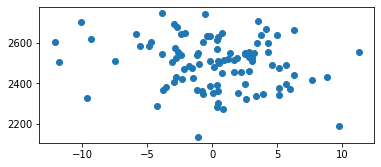

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_lin = reg.predict(X_test)
residual = y_test - y_pred_lin
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, y_pred_lin)

# In above Output.
**Both can be tested by plotting residuals vs. predictions, where residuals are prediction errors.
It seems like the corresponding residual plot is reasonably random**

/home/manjotsingh/PYTHON/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Close'>

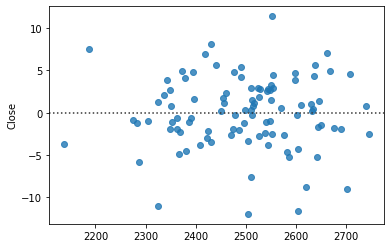

In [94]:
sns.residplot(y_pred_lin, residual)

# From the above plot we can conclude that there is no heteroscedasticity.

0.9752264870168317

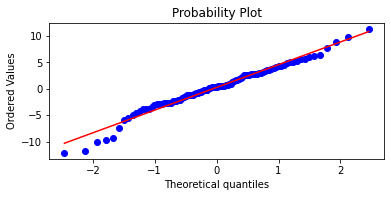

In [96]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

# XGBOOST

In [97]:
from xgboost import XGBRegressor
param_grid = {"xgb__learning rate":[0.01,0.011,0.009],
              "xgb__objective":["multiclass"],
              "min_child_weight":[0.5,0.51,0.511],
              "subsample":[0.5,0.51,0.511],
              "n_estimators":[500,550,600],
              "colsample_bynode":[0.3,0.2,0.35],
              'max_delta_step':[15,13,14],
              'colsample_bytree':[0.4,0.3,0.2],
              'max_depth':[5,6,7]
             }
xgb=XGBRegressor(**param_grid)
from sklearn.model_selection import GridSearchCV,KFold

In [98]:
kfold = 3
kf = KFold(
        n_splits=kfold, shuffle=True,random_state=42
        )

clf = GridSearchCV(
            estimator=xgb,
            n_jobs=-1,
            param_grid=param_grid,
            verbose=5,
            cv=kf,
            refit=True  
        )
clf.fit(X_train,y_train)

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1244 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 1712 tasks      | elapsed:   37.7s
[Parallel(n_jobs=-1)]: Done 2252 tasks      | elapsed:   49.7s
[Parallel(n_jobs=-1)]: Done 2864 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3548 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 4304 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5132 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 6032 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 7004 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 8048 tasks      | e

[16:31:33] WARNING: ../src/learner.cc:516: 
Parameters: { xgb__learning rate, xgb__objective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 19683 out of 19683 | elapsed:  7.8min finished


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=[0.3, 0.2, 0.35],
                                    colsample_bytree=[0.4, 0.3, 0.2],
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None,
                                    max_delta_step=[15, 13, 14],
                                    max_depth=[5, 6, 7],
                                    min_child_w...
                                    xgb__learning rate=[0.01, 0.011, 0.009],
                                    xgb__objective=['multiclass']),
             n_jobs=-1,
             param_grid={'colsample_bynode': [0.3, 0.2, 0.35],
                  

In [99]:
xgb=clf.best_estimator_
clf.best_params_ 

{'colsample_bynode': 0.35,
 'colsample_bytree': 0.4,
 'max_delta_step': 15,
 'max_depth': 7,
 'min_child_weight': 0.5,
 'n_estimators': 600,
 'subsample': 0.5,
 'xgb__learning rate': 0.01,
 'xgb__objective': 'multiclass'}

In [100]:
import joblib
joblib.dump(xgb,"model2.pkl")
xgb=joblib.load("model2.pkl")

In [101]:
from sklearn.metrics import r2_score,mean_absolute_error
y_pred=xgb.predict(X_test)
print("mae",mean_absolute_error(y_test,y_pred))
print("r2",r2_score(y_test,y_pred))

mae 10.139258798926745
r2 0.985307917924681


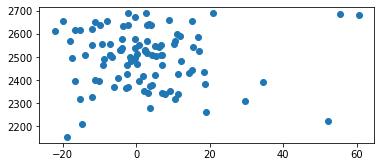

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_ridge = xgb.predict(X_test)
residual = y_test - y_pred_ridge
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, y_pred_ridge)

/home/manjotsingh/PYTHON/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Close'>

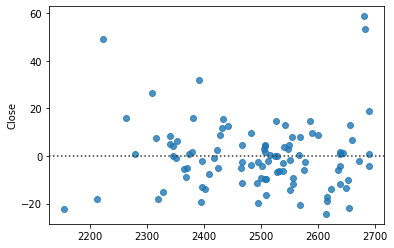

In [103]:
sns.residplot(y_pred_ridge, residual)

0.885681328952929

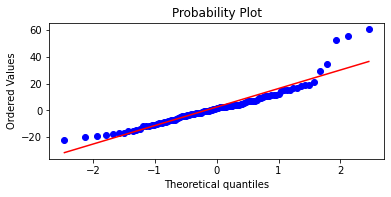

In [104]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

# SVM

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
svc = svm.SVR(gamma="scale")
parameters = {'kernel':('linear', 'rbf'), 'C':[0.001,0.01,0.1,1,10],'epsilon':[0.01,0.1]}
clf = GridSearchCV(svc, parameters, cv=3)
clf.fit(X_train,y_train)
#make predictions and find the rmse
preds_clf = clf.predict(X_test)
print("mae",mean_absolute_error(y_test,preds_clf), clf.best_params_)

mae 3.3678397691184516 {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}


In [106]:
import joblib
joblib.dump(clf,"model3.pkl")
clf=joblib.load("model3.pkl")

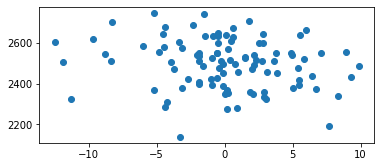

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_svm = clf.predict(X_test)
residual = y_test - y_pred_svm
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, y_pred_svm)

/home/manjotsingh/PYTHON/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Close'>

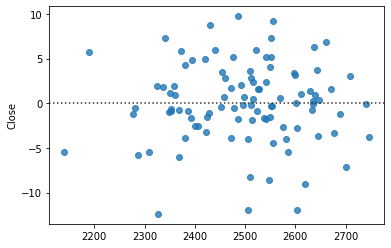

In [108]:
sns.residplot(y_pred_svm, residual)

0.9783982651113462

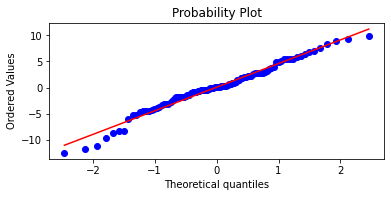

In [109]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

# TESTING

In [110]:
# for Linear model
from sklearn.metrics import r2_score,mean_absolute_error
x_test_case = X_test[:5]
y_test_case = y_test[1:6]
y_pred_ts = reg.predict(x_test_case)
print("mae",mean_absolute_error(y_test_case,y_pred_ts))
print("r2",r2_score(y_test_case,y_pred_ts))

mae 82.21513869966111
r2 -0.3741092532056378


In [111]:
#for xgboost model
from sklearn.metrics import r2_score,mean_absolute_error
x_test_case = X_test[:5]
y_test_case = y_test[1:6]
y_pred_ts = xgb.predict(x_test_case)
print("mae",mean_absolute_error(y_test_case,y_pred_ts))
print("r2",r2_score(y_test_case,y_pred_ts))

mae 84.44378906249995
r2 -0.4398332692659066


In [112]:
#for SVM model
from sklearn.metrics import r2_score,mean_absolute_error
x_test_case = X_test[:5]
y_test_case = y_test[1:6]
y_pred_ts = clf.predict(x_test_case)
print("mae",mean_absolute_error(y_test_case,y_pred_ts))
print("r2",r2_score(y_test_case,y_pred_ts))

mae 81.34790712342756
r2 -0.3729210727734318


# We will hand tune xgboost model

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
from xgboost import XGBRegressor
param_grid = {"xgb__learning rate":[0.01,0.015,0.02],
              "xgb__objective":["multiclass"],
              "min_child_weight":[0.5,0.57,0.4],
              "subsample":[0.5,0.56,0.53],
              "n_estimators":[700,800,900],
              "colsample_bynode":[0.5,0.35,0.4],
              'max_delta_step':[12,10,11],
              'colsample_bytree':[0.4,0.5,0.45],
              'max_depth':[5,6,7]
             }
xgb=XGBRegressor(**param_grid)
from sklearn.model_selection import GridSearchCV,KFold

In [114]:
kfold = 3
kf = KFold(
        n_splits=kfold, shuffle=True,random_state=42
        )

clf = GridSearchCV(
            estimator=xgb,
            n_jobs=-1,
            param_grid=param_grid,
            verbose=5,
            cv=kf,
            refit=True  
        )
clf.fit(X_train,y_train)

Fitting 3 folds for each of 6561 candidates, totalling 19683 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 1394 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1664 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1970 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2312 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2690 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 3104 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 3554 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 4040 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 4562 tasks      | e

[16:49:42] WARNING: ../src/learner.cc:516: 
Parameters: { xgb__learning rate, xgb__objective } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=[0.5, 0.35, 0.4],
                                    colsample_bytree=[0.4, 0.5, 0.45],
                                    gamma=None, gpu_id=None,
                                    importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None,
                                    max_delta_step=[12, 10, 11],
                                    max_depth=[5, 6, 7],
                                    min_child_...
                                    xgb__learning rate=[0.01, 0.015, 0.02],
                                    xgb__objective=['multiclass']),
             n_jobs=-1,
             param_grid={'colsample_bynode': [0.5, 0.35, 0.4],
                   

In [115]:
xgb=clf.best_estimator_
print(clf.best_params_) 
from sklearn.metrics import r2_score,mean_absolute_error
x_test_case = X_test[:5]
y_test_case = y_test[1:6]
y_pred_ts = xgb.predict(x_test_case)
print("mae",mean_absolute_error(y_test_case,y_pred_ts))
print("r2",r2_score(y_test_case,y_pred_ts))

{'colsample_bynode': 0.5, 'colsample_bytree': 0.5, 'max_delta_step': 11, 'max_depth': 7, 'min_child_weight': 0.5, 'n_estimators': 900, 'subsample': 0.53, 'xgb__learning rate': 0.01, 'xgb__objective': 'multiclass'}
mae 84.13753906249994
r2 -0.39493370422622354


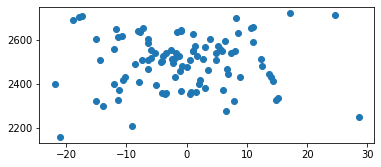

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred_svm = clf.predict(X_test)
residual = y_test - y_pred_svm
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, y_pred_svm)

/home/manjotsingh/PYTHON/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Close'>

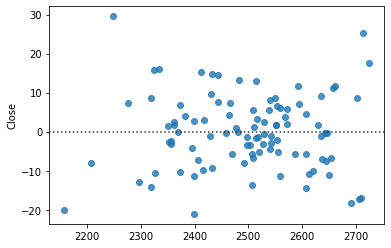

In [117]:
sns.residplot(y_pred_svm, residual)

0.9908485451534915

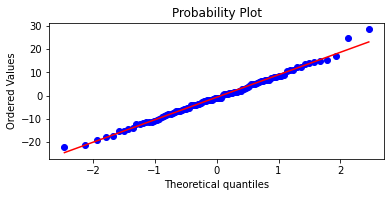

In [118]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

In [119]:
#After tuning there is a difference in the MAE. 

# THE END